In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns

# 앙상블

## 랜덤포레스트 - 유방암데이터

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lsda02/data/breast-cancer-wisconsin.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 모델 훈련 & 교차검증

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1, random_state=42)
scores = cross_validate(rf, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.5542, 0.501 , 0.3892, 0.5162, 0.4816, 0.495 , 0.5553, 0.4452,
       0.4678, 0.419 ]), 'score_time': array([0.0698, 0.0403, 0.0871, 0.1112, 0.086 , 0.0943, 0.0535, 0.0824,
       0.0792, 0.0612]), 'test_score': array([0.9583, 0.9792, 0.9167, 0.9583, 0.9583, 0.9375, 1.    , 0.9792,
       0.9574, 0.9574]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9602393617021278


### 변수 중요도

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
rf.feature_importances_

array([0.0457, 0.3368, 0.2346, 0.0423, 0.0349, 0.1535, 0.0711, 0.0729,
       0.0083])

In [ ]:
f_imp_v = rf.feature_importances_

In [ ]:
f_imp_v = pd.Series(f_imp_v, index = X.columns)

In [ ]:
f_imp_v.sort_values(ascending = False)

cell_size          0.336821
cell_shape         0.234638
bare_nuclei        0.153507
normal_nucleoli    0.072855
chromatin          0.071070
clump              0.045657
adhesion           0.042269
epithlial          0.034877
mitoses            0.008307
dtype: float64

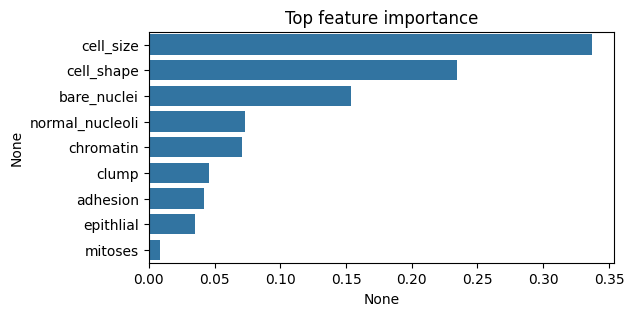

In [ ]:
f_top = f_imp_v.sort_values(ascending = False)
plt.figure(figsize = (6, 3))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')
plt.show()

### 성능평가

In [ ]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[4 2 2 4 2]
[4 2 2 4 2]
[4 4 2 2 2]
[4 4 2 2 2]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

1.0
0.9512195121951219


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[317   0]
 [  0 161]]
[[125   2]
 [  8  70]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       317
           4       1.00      1.00      1.00       161

    accuracy                           1.00       478
   macro avg       1.00      1.00      1.00       478
weighted avg       1.00      1.00      1.00       478

              precision    recall  f1-score   support

           2       0.94      0.98      0.96       127
           4       0.97      0.90      0.93        78

    accuracy                           0.95       205
   macro avg       0.96      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



### OOB

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(oob_score=True, n_jobs = -1, random_state=42)
rf.fit(X_train, y_train)
print(rf.oob_score_)

0.9644351464435147


### 랜덤 서치

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'min_impurity_decrease': uniform(0.0001, 0.0011),
          'max_depth': randint(2, 12),
          'min_samples_split': randint(2, 52),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs = RandomizedSearchCV(RandomForestClassifier(n_jobs = -1, random_state=42),
                        params, n_iter = 100, n_jobs = -1, random_state=42)

In [ ]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78db4849ace0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78db49488a90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78db4849abf0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78db498e64a0>},
                   random_state=42)

In [ ]:
# 최적 모델
best_model = rs.best_estimator_
best_model

RandomForestClassifier(max_depth=11, min_impurity_decrease=0.000914845479529625,
                       min_samples_split=10, n_jobs=-1, random_state=42)

In [ ]:
# 정확도
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

0.9769874476987448
0.9609756097560975


In [ ]:
# 최적 모델의 매개변수
rs.best_params_

{'max_depth': 11,
 'min_impurity_decrease': 0.000914845479529625,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [ ]:
rs.cv_results_['params']

[{'max_depth': 8,
  'min_impurity_decrease': 0.0009761972855462562,
  'min_samples_leaf': 15,
  'min_samples_split': 44},
 {'max_depth': 9,
  'min_impurity_decrease': 0.0007585243326167404,
  'min_samples_leaf': 7,
  'min_samples_split': 20},
 {'max_depth': 8,
  'min_impurity_decrease': 0.00016389197338501942,
  'min_samples_leaf': 24,
  'min_samples_split': 37},
 {'max_depth': 9,
  'min_impurity_decrease': 0.0008788798355756502,
  'min_samples_leaf': 22,
  'min_samples_split': 3},
 {'max_depth': 9,
  'min_impurity_decrease': 0.001015686904880464,
  'min_samples_leaf': 6,
  'min_samples_split': 3},
 {'max_depth': 6,
  'min_impurity_decrease': 0.0007792296605904882,
  'min_samples_leaf': 22,
  'min_samples_split': 45},
 {'max_depth': 10,
  'min_impurity_decrease': 0.0004203520542178461,
  'min_samples_leaf': 10,
  'min_samples_split': 29},
 {'max_depth': 4,
  'min_impurity_decrease': 0.0005207081903938791,
  'min_samples_leaf': 20,
  'min_samples_split': 4},
 {'max_depth': 6,
  'min_imp

In [ ]:
len(rs.cv_results_['mean_test_score'])

100

In [ ]:
np.max(rs.cv_results_['mean_test_score'])

0.9749122807017544

### 성능평가

In [ ]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[4 2 2 4 2]
[4 2 2 4 2]
[4 4 2 2 2]
[4 4 2 2 2]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.9769874476987448
0.9609756097560975


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[309   8]
 [  3 158]]
[[125   2]
 [  6  72]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           2       0.99      0.97      0.98       317
           4       0.95      0.98      0.97       161

    accuracy                           0.98       478
   macro avg       0.97      0.98      0.97       478
weighted avg       0.98      0.98      0.98       478

              precision    recall  f1-score   support

           2       0.95      0.98      0.97       127
           4       0.97      0.92      0.95        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.96       205
weighted avg       0.96      0.96      0.96       205



In [ ]:
# ROC - 1 기준
y_test_proba1 = best_model.predict_proba(X_test)[:,1]

In [ ]:
# 더미변수
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
print(y_test)
y_test_new = label_encoder.fit_transform(y_test)
print(y_test_new)

304    4
149    4
217    2
120    2
314    2
      ..
268    4
360    4
238    4
634    2
572    2
Name: class, Length: 205, dtype: int64
[1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0]


In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test_new, y_test_proba1)

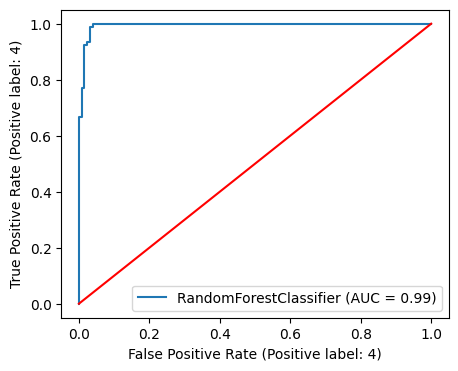

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.9943468604885928
0.9943468604885928


## 엑스트라트리 - 유방암데이터

In [ ]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 모델 훈련 & 교차검증

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesClassifier
# DecisionTreeClassifier(splitter = 'random') 사용
et = ExtraTreesClassifier(n_jobs = -1, random_state=42)
scores = cross_validate(et, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.4919, 0.56  , 0.2655, 0.2805, 0.2861, 0.26  , 0.2493, 0.2423,
       0.2525, 0.2531]), 'score_time': array([0.0403, 0.0549, 0.0397, 0.0397, 0.0418, 0.04  , 0.0387, 0.0405,
       0.0385, 0.0399]), 'test_score': array([0.9583, 0.9792, 0.9583, 0.9583, 0.9583, 0.9583, 0.9792, 0.9792,
       0.9574, 0.9574]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9644060283687944


### 모델 훈련 & 교차검증 - 나무 개수 증가

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators = 200, n_jobs = -1, random_state=42)
scores = cross_validate(et, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.5277, 0.5157, 0.4848, 0.4972, 0.4973, 0.4893, 0.5189, 0.4997,
       1.0898, 1.1936]), 'score_time': array([0.0712, 0.0715, 0.0853, 0.1016, 0.0711, 0.0721, 0.0711, 0.0736,
       0.109 , 0.0709]), 'test_score': array([0.9583, 0.9792, 0.9375, 0.9583, 0.9583, 0.9375, 0.9792, 0.9792,
       0.9574, 0.9574]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9602393617021278


### 변수 중요도

In [ ]:
et.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
et.feature_importances_

array([0.0681, 0.1952, 0.1616, 0.0503, 0.0656, 0.2767, 0.081 , 0.0873,
       0.0141])

In [ ]:
f_imp_v = et.feature_importances_

In [ ]:
f_imp_v = pd.Series(f_imp_v, index = X.columns)

In [ ]:
f_imp_v.sort_values(ascending = False)

bare_nuclei        0.276707
cell_size          0.195227
cell_shape         0.161643
normal_nucleoli    0.087288
chromatin          0.081003
clump              0.068119
epithlial          0.065631
adhesion           0.050312
mitoses            0.014070
dtype: float64

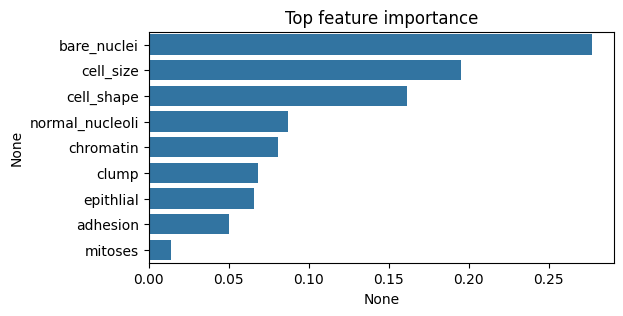

In [ ]:
f_top = f_imp_v.sort_values(ascending = False)
plt.figure(figsize = (6, 3))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')
plt.show()

### 성능평가

In [ ]:
y_train_pred = et.predict(X_train)
y_test_pred = et.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[4 2 2 4 2]
[4 2 2 4 2]
[4 4 2 2 2]
[4 4 2 2 2]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

1.0
0.9560975609756097


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[317   0]
 [  0 161]]
[[124   3]
 [  6  72]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       317
           4       1.00      1.00      1.00       161

    accuracy                           1.00       478
   macro avg       1.00      1.00      1.00       478
weighted avg       1.00      1.00      1.00       478

              precision    recall  f1-score   support

           2       0.95      0.98      0.96       127
           4       0.96      0.92      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



### 랜덤 서치

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'min_impurity_decrease': uniform(0.0001, 0.0011),
          'max_depth': randint(2, 12),
          'min_samples_split': randint(2, 52),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs = RandomizedSearchCV(ExtraTreesClassifier(n_jobs = -1, random_state=42),
                        params, n_iter = 100, n_jobs = -1, random_state=42)

In [ ]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=ExtraTreesClassifier(n_jobs=-1, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78db49555300>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78db49571060>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78db4989c8e0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78db48568a30>},
                   random_state=42)

In [ ]:
# 최적 모델
best_model = rs.best_estimator_
best_model

ExtraTreesClassifier(max_depth=8, min_impurity_decrease=0.0011304029876104081,
                     min_samples_split=12, n_jobs=-1, random_state=42)

In [ ]:
# 정확도
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

0.9769874476987448
0.9560975609756097


In [ ]:
# 최적 모델의 매개변수
rs.best_params_

{'max_depth': 8,
 'min_impurity_decrease': 0.0011304029876104081,
 'min_samples_leaf': 1,
 'min_samples_split': 12}

In [ ]:
rs.cv_results_['params']

[{'max_depth': 8,
  'min_impurity_decrease': 0.0009761972855462562,
  'min_samples_leaf': 15,
  'min_samples_split': 44},
 {'max_depth': 9,
  'min_impurity_decrease': 0.0007585243326167404,
  'min_samples_leaf': 7,
  'min_samples_split': 20},
 {'max_depth': 8,
  'min_impurity_decrease': 0.00016389197338501942,
  'min_samples_leaf': 24,
  'min_samples_split': 37},
 {'max_depth': 9,
  'min_impurity_decrease': 0.0008788798355756502,
  'min_samples_leaf': 22,
  'min_samples_split': 3},
 {'max_depth': 9,
  'min_impurity_decrease': 0.001015686904880464,
  'min_samples_leaf': 6,
  'min_samples_split': 3},
 {'max_depth': 6,
  'min_impurity_decrease': 0.0007792296605904882,
  'min_samples_leaf': 22,
  'min_samples_split': 45},
 {'max_depth': 10,
  'min_impurity_decrease': 0.0004203520542178461,
  'min_samples_leaf': 10,
  'min_samples_split': 29},
 {'max_depth': 4,
  'min_impurity_decrease': 0.0005207081903938791,
  'min_samples_leaf': 20,
  'min_samples_split': 4},
 {'max_depth': 6,
  'min_imp

In [ ]:
len(rs.cv_results_['mean_test_score'])

100

In [ ]:
np.max(rs.cv_results_['mean_test_score'])

0.9749122807017544

### 성능평가

In [ ]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[4 2 2 4 2]
[4 2 2 4 2]
[4 4 2 2 2]
[4 4 2 2 2]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.9769874476987448
0.9560975609756097


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[309   8]
 [  3 158]]
[[124   3]
 [  6  72]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           2       0.99      0.97      0.98       317
           4       0.95      0.98      0.97       161

    accuracy                           0.98       478
   macro avg       0.97      0.98      0.97       478
weighted avg       0.98      0.98      0.98       478

              precision    recall  f1-score   support

           2       0.95      0.98      0.96       127
           4       0.96      0.92      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



In [ ]:
# ROC - 1 기준
y_test_proba1 = best_model.predict_proba(X_test)[:,1]

In [ ]:
# 더미변수
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
print(y_test)
y_test_new = label_encoder.fit_transform(y_test)
print(y_test_new)

304    4
149    4
217    2
120    2
314    2
      ..
268    4
360    4
238    4
634    2
572    2
Name: class, Length: 205, dtype: int64
[1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0]


In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test_new, y_test_proba1)

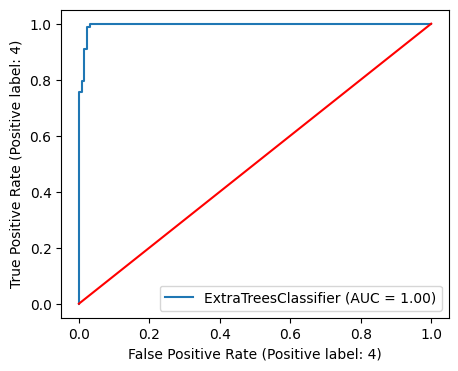

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test_new, y_test_proba1))

0.9956591964465981


In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.9956591964465981
0.9956591964465981


## 그레이디언트 부스팅 - 유방암데이터

In [ ]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 모델 훈련 & 교차검증

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.219 , 0.2077, 0.1836, 0.192 , 0.184 , 0.1858, 0.1843, 0.1915,
       0.1869, 0.161 ]), 'score_time': array([0.0043, 0.0051, 0.0047, 0.0046, 0.0047, 0.0048, 0.0046, 0.0047,
       0.0047, 0.0029]), 'test_score': array([0.9583, 1.    , 0.9375, 0.9583, 0.9583, 0.9583, 0.9792, 0.9792,
       0.9574, 0.9574]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9644060283687944


### 모델 훈련 & 교차검증 - subsample

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(subsample = 0.1, random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.3254, 0.4029, 0.2267, 0.3528, 0.3918, 0.4189, 0.4503, 0.4562,
       0.5232, 0.4956]), 'score_time': array([0.0049, 0.0048, 0.0049, 0.0118, 0.0133, 0.0148, 0.0245, 0.0047,
       0.0043, 0.0049]), 'test_score': array([1.    , 1.    , 0.9167, 0.9792, 0.9583, 0.9792, 1.    , 0.9792,
       0.9362, 0.9574]), 'train_score': array([0.9698, 0.9767, 0.986 , 0.9814, 0.9791, 0.9814, 0.9791, 0.9837,
       0.9791, 0.9838])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9800086332487995 0.9706117021276597


### 모델 훈련 & 교차검증 - 나무 개수 증가

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=200, random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.3751, 0.3705, 0.3647, 0.3772, 0.4255, 0.6626, 0.5285, 0.5718,
       0.6757, 0.4998]), 'score_time': array([0.0052, 0.0049, 0.0049, 0.0049, 0.0049, 0.0051, 0.0051, 0.0047,
       0.0151, 0.0052]), 'test_score': array([0.9792, 0.9792, 0.9167, 0.9583, 0.9583, 0.9792, 0.9792, 0.9792,
       0.9574, 0.9574]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9644060283687944


### 모델 훈련 & 교차검증 - 학습률 증가

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.2, random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.2038, 0.1992, 0.1851, 0.1839, 0.1886, 0.1854, 0.191 , 0.1847,
       0.1916, 0.1871]), 'score_time': array([0.0046, 0.0057, 0.0047, 0.0051, 0.0046, 0.0047, 0.0046, 0.0047,
       0.0046, 0.0048]), 'test_score': array([0.9792, 0.9792, 0.9167, 0.9583, 0.9583, 0.9792, 0.9792, 0.9583,
       0.9574, 0.9787]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.964450354609929


### 변수 중요도

In [ ]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, random_state=42)

In [ ]:
gb.feature_importances_

array([0.028 , 0.7661, 0.0361, 0.0061, 0.0178, 0.1138, 0.0182, 0.0126,
       0.0013])

In [ ]:
f_imp_v = gb.feature_importances_

In [ ]:
f_imp_v = pd.Series(f_imp_v, index = X.columns)

In [ ]:
f_imp_v.sort_values(ascending = False)

cell_size          0.766097
bare_nuclei        0.113750
cell_shape         0.036093
clump              0.028019
chromatin          0.018247
epithlial          0.017752
normal_nucleoli    0.012624
adhesion           0.006136
mitoses            0.001282
dtype: float64

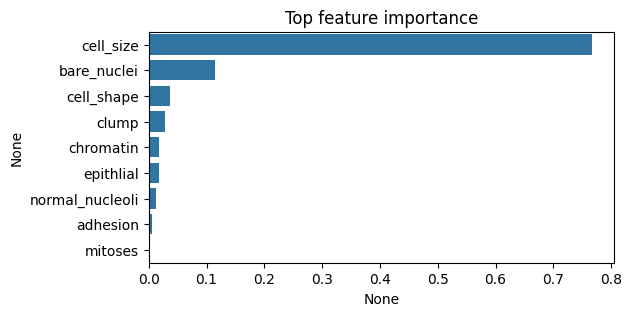

In [ ]:
f_top = f_imp_v.sort_values(ascending = False)
plt.figure(figsize = (6, 3))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')
plt.show()

### 성능평가

In [ ]:
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[4 2 2 4 2]
[4 2 2 4 2]
[4 4 2 2 2]
[4 4 2 2 2]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

1.0
0.9609756097560975


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[317   0]
 [  0 161]]
[[124   3]
 [  5  73]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       317
           4       1.00      1.00      1.00       161

    accuracy                           1.00       478
   macro avg       1.00      1.00      1.00       478
weighted avg       1.00      1.00      1.00       478

              precision    recall  f1-score   support

           2       0.96      0.98      0.97       127
           4       0.96      0.94      0.95        78

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



### 랜덤 서치

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'min_impurity_decrease': uniform(0.0001, 0.0011),
          'max_depth': randint(2, 12),
          'min_samples_split': randint(2, 52),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs = RandomizedSearchCV(GradientBoostingClassifier(random_state=42),
                        params, n_iter = 100, n_jobs = -1, random_state=42)

In [ ]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78db491b0790>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78db494264a0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78db491b0730>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78db491b12d0>},
                   random_state=42)

In [ ]:
# 최적 모델
best_model = rs.best_estimator_
best_model

GradientBoostingClassifier(max_depth=2,
                           min_impurity_decrease=0.00026578929836197244,
                           min_samples_leaf=6, min_samples_split=17,
                           random_state=42)

In [ ]:
# 정확도
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

0.9895397489539749
0.9560975609756097


In [ ]:
# 최적 모델의 매개변수
rs.best_params_

{'max_depth': 2,
 'min_impurity_decrease': 0.00026578929836197244,
 'min_samples_leaf': 6,
 'min_samples_split': 17}

In [ ]:
rs.cv_results_['params']

[{'max_depth': 8,
  'min_impurity_decrease': 0.0009761972855462562,
  'min_samples_leaf': 15,
  'min_samples_split': 44},
 {'max_depth': 9,
  'min_impurity_decrease': 0.0007585243326167404,
  'min_samples_leaf': 7,
  'min_samples_split': 20},
 {'max_depth': 8,
  'min_impurity_decrease': 0.00016389197338501942,
  'min_samples_leaf': 24,
  'min_samples_split': 37},
 {'max_depth': 9,
  'min_impurity_decrease': 0.0008788798355756502,
  'min_samples_leaf': 22,
  'min_samples_split': 3},
 {'max_depth': 9,
  'min_impurity_decrease': 0.001015686904880464,
  'min_samples_leaf': 6,
  'min_samples_split': 3},
 {'max_depth': 6,
  'min_impurity_decrease': 0.0007792296605904882,
  'min_samples_leaf': 22,
  'min_samples_split': 45},
 {'max_depth': 10,
  'min_impurity_decrease': 0.0004203520542178461,
  'min_samples_leaf': 10,
  'min_samples_split': 29},
 {'max_depth': 4,
  'min_impurity_decrease': 0.0005207081903938791,
  'min_samples_leaf': 20,
  'min_samples_split': 4},
 {'max_depth': 6,
  'min_imp

In [ ]:
len(rs.cv_results_['mean_test_score'])

100

In [ ]:
np.max(rs.cv_results_['mean_test_score'])

0.968640350877193

### 성능평가

In [ ]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[4 2 2 4 2]
[4 2 2 4 2]
[4 4 2 2 2]
[4 4 2 2 2]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.9895397489539749
0.9560975609756097


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[314   3]
 [  2 159]]
[[124   3]
 [  6  72]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           2       0.99      0.99      0.99       317
           4       0.98      0.99      0.98       161

    accuracy                           0.99       478
   macro avg       0.99      0.99      0.99       478
weighted avg       0.99      0.99      0.99       478

              precision    recall  f1-score   support

           2       0.95      0.98      0.96       127
           4       0.96      0.92      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



In [ ]:
# ROC - 1 기준
y_test_proba1 = best_model.predict_proba(X_test)[:,1]

In [ ]:
# 더미변수
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
print(y_test)
y_test_new = label_encoder.fit_transform(y_test)
print(y_test_new)

304    4
149    4
217    2
120    2
314    2
      ..
268    4
360    4
238    4
634    2
572    2
Name: class, Length: 205, dtype: int64
[1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0]


In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test_new, y_test_proba1)

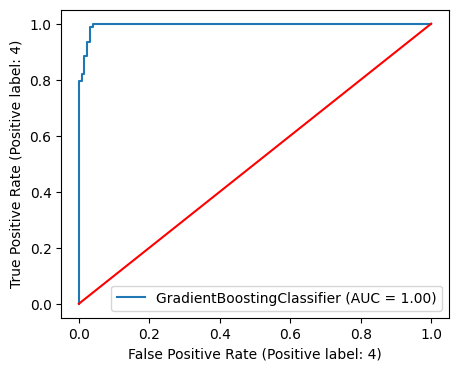

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.9954572986069048
0.9954572986069048


## 히스토그램 기반 그레이디언트 부스팅 - 유방암데이터

In [ ]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 모델 훈련 & 교차검증

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.4522, 0.4022, 0.4192, 0.4508, 0.5204, 0.4045, 0.4442, 0.4662,
       0.3606, 0.3298]), 'score_time': array([0.0092, 0.007 , 0.0176, 0.0087, 0.0139, 0.0226, 0.0157, 0.0115,
       0.0076, 0.0043]), 'test_score': array([0.9792, 0.9792, 0.9167, 0.9583, 0.9583, 0.9792, 0.9792, 0.9583,
       0.9574, 0.9574]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.962322695035461


### 변수 중요도

In [ ]:
hgb.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=42)

In [ ]:
from sklearn.inspection import permutation_importance
f_imp_v = permutation_importance(hgb, X_train, y_train, n_repeats = 10, random_state=42)

In [ ]:
f_imp_v.importances_mean

array([0.0234, 0.0103, 0.0059, 0.0056, 0.0038, 0.0682, 0.0111, 0.0044,
       0.    ])

In [ ]:
f_imp_v = pd.Series(f_imp_v.importances_mean, index = X.columns)

In [ ]:
f_imp_v.sort_values(ascending = False)

bare_nuclei        0.068201
clump              0.023431
chromatin          0.011088
cell_size          0.010251
cell_shape         0.005858
adhesion           0.005649
normal_nucleoli    0.004393
epithlial          0.003766
mitoses            0.000000
dtype: float64

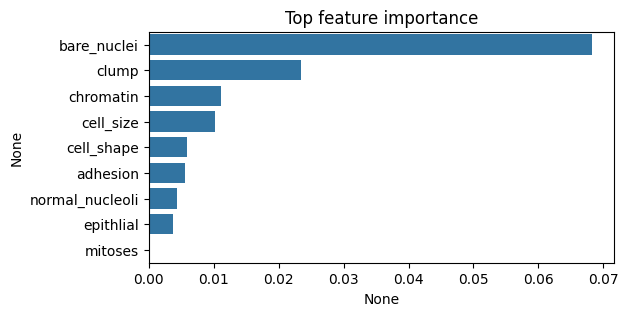

In [ ]:
f_top = f_imp_v.sort_values(ascending = False)
plt.figure(figsize = (6, 3))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')
plt.show()

### 성능평가

In [ ]:
y_train_pred = hgb.predict(X_train)
y_test_pred = hgb.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[4 2 2 4 2]
[4 2 2 4 2]
[4 4 2 2 2]
[4 4 2 2 2]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

1.0
0.9560975609756097


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[317   0]
 [  0 161]]
[[125   2]
 [  7  71]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       317
           4       1.00      1.00      1.00       161

    accuracy                           1.00       478
   macro avg       1.00      1.00      1.00       478
weighted avg       1.00      1.00      1.00       478

              precision    recall  f1-score   support

           2       0.95      0.98      0.97       127
           4       0.97      0.91      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



### 랜덤 서치

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'max_depth': randint(2, 12),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs = RandomizedSearchCV(HistGradientBoostingClassifier(random_state=42),
                        params, n_iter = 100, n_jobs = -1, random_state=42)

In [ ]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=HistGradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78db484e0430>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78db484e0f70>},
                   random_state=42)

In [ ]:
# 최적 모델
best_model = rs.best_estimator_
best_model

HistGradientBoostingClassifier(max_depth=2, min_samples_leaf=1, random_state=42)

In [ ]:
# 정확도
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

0.9916317991631799
0.9512195121951219


In [ ]:
# 최적 모델의 매개변수
rs.best_params_

{'max_depth': 2, 'min_samples_leaf': 1}

In [ ]:
rs.cv_results_['params']

[{'max_depth': 8, 'min_samples_leaf': 20},
 {'max_depth': 9, 'min_samples_leaf': 21},
 {'max_depth': 8, 'min_samples_leaf': 19},
 {'max_depth': 8, 'min_samples_leaf': 11},
 {'max_depth': 9, 'min_samples_leaf': 21},
 {'max_depth': 5, 'min_samples_leaf': 8},
 {'max_depth': 9, 'min_samples_leaf': 3},
 {'max_depth': 7, 'min_samples_leaf': 21},
 {'max_depth': 3, 'min_samples_leaf': 24},
 {'max_depth': 7, 'min_samples_leaf': 2},
 {'max_depth': 6, 'min_samples_leaf': 1},
 {'max_depth': 11, 'min_samples_leaf': 22},
 {'max_depth': 10, 'min_samples_leaf': 17},
 {'max_depth': 11, 'min_samples_leaf': 16},
 {'max_depth': 4, 'min_samples_leaf': 12},
 {'max_depth': 8, 'min_samples_leaf': 20},
 {'max_depth': 10, 'min_samples_leaf': 3},
 {'max_depth': 6, 'min_samples_leaf': 19},
 {'max_depth': 8, 'min_samples_leaf': 21},
 {'max_depth': 10, 'min_samples_leaf': 7},
 {'max_depth': 3, 'min_samples_leaf': 4},
 {'max_depth': 10, 'min_samples_leaf': 14},
 {'max_depth': 3, 'min_samples_leaf': 9},
 {'max_depth'

In [ ]:
len(rs.cv_results_['mean_test_score'])

100

In [ ]:
np.max(rs.cv_results_['mean_test_score'])

0.9728289473684211

### 성능평가

In [ ]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[4 2 2 4 2]
[4 2 2 4 2]
[4 4 2 2 2]
[4 4 2 2 2]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.9916317991631799
0.9512195121951219


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[314   3]
 [  1 160]]
[[123   4]
 [  6  72]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           2       1.00      0.99      0.99       317
           4       0.98      0.99      0.99       161

    accuracy                           0.99       478
   macro avg       0.99      0.99      0.99       478
weighted avg       0.99      0.99      0.99       478

              precision    recall  f1-score   support

           2       0.95      0.97      0.96       127
           4       0.95      0.92      0.94        78

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [ ]:
# ROC - 1 기준
y_test_proba1 = best_model.predict_proba(X_test)[:,1]

In [ ]:
# 더미변수
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
print(y_test)
y_test_new = label_encoder.fit_transform(y_test)
print(y_test_new)

304    4
149    4
217    2
120    2
314    2
      ..
268    4
360    4
238    4
634    2
572    2
Name: class, Length: 205, dtype: int64
[1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0]


In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test_new, y_test_proba1)

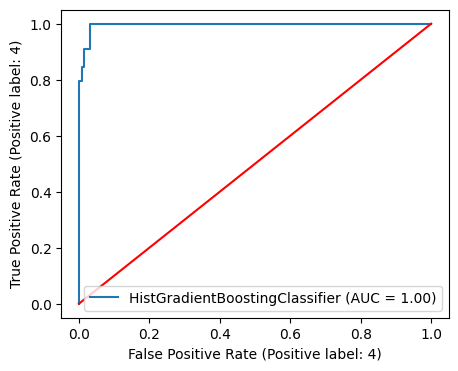

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.9957601453664446
0.9957601453664446


## Xgboost - 유방암데이터

In [ ]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 모델 훈련 & 교차검증

In [ ]:
# 더미변수
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
print(y_train)
y_train = label_encoder.fit_transform(y_train)
print(y_train)

183    4
472    2
444    2
85     4
516    2
      ..
73     4
108    2
279    4
450    2
104    4
Name: class, Length: 478, dtype: int64
[1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0
 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0
 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0
 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 

In [ ]:
from sklearn.model_selection import cross_validate
from xgboost import  XGBClassifier
xgb = XGBClassifier(tree_method = 'hist', random_state=42)
scores = cross_validate(xgb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.081 , 0.079 , 0.0595, 0.0531, 0.049 , 0.0472, 0.0478, 0.0457,
       0.0563, 0.0501]), 'score_time': array([0.0063, 0.0089, 0.0081, 0.0153, 0.0058, 0.0057, 0.0064, 0.0104,
       0.0062, 0.0066]), 'test_score': array([0.9167, 0.9792, 0.9375, 0.9583, 0.9583, 0.9583, 0.9792, 0.9792,
       0.9362, 0.9787]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9581560283687944


## Lightgbm - 유방암데이터

In [ ]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 모델 훈련 & 교차검증

In [ ]:
from sklearn.model_selection import cross_validate
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.2053, 0.3123, 0.2085, 0.2263, 0.0884, 0.1802, 0.1764, 0.2452,
       0.2685, 0.1794]), 'score_time': array([0.0351, 0.0136, 0.0207, 0.0136, 0.0044, 0.0112, 0.029 , 0.0171,
       0.0113, 0.0045]), 'test_score': array([0.9792, 0.9583, 0.9167, 0.9583, 0.9375, 0.9792, 0.9792, 0.9583,
       0.9574, 0.9574]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9581560283687944


# 비지도 학습

## KMC - 캔디바 데이터

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/CandyBars.xlsx', engine = 'openpyxl')
df.head()

,Brands,Calories,Fat,Protein,Carb
0,Peanut Butter Twix,311.0,18.5,5.3,31.4
1,Baby Ruth,275.0,13.0,3.2,39.0
2,Caramel Twix,284.5,14.0,2.5,37.5
3,5th Avenue,279.5,12.5,4.5,41.0
4,Snickers,273.0,14.0,4.5,34.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Brands    37 non-null     object 
 1   Calories  37 non-null     float64
 2   Fat       37 non-null     float64
 3   Protein   37 non-null     float64
 4   Carb      37 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.6+ KB


In [ ]:
df.drop('Brands', axis = 1).describe()

,Calories,Fat,Protein,Carb
count,37.000000,37.000000,37.000000,37.000000
mean,225.864865,10.529730,3.135135,32.394595
std,37.910649,4.121681,1.723242,9.158995
min,139.000000,1.000000,0.000000,19.000000
25%,209.000000,8.500000,2.000000,28.500000
50%,229.500000,11.500000,2.500000,31.500000
75%,245.500000,13.000000,4.500000,34.000000
max,311.000000,18.500000,7.000000,66.000000


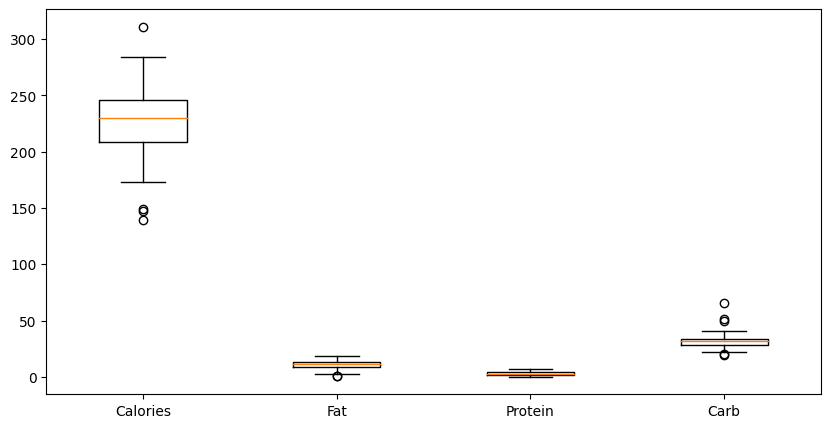

In [ ]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(x = [df['Calories'], df['Fat'], df['Protein'], df['Carb']],
           labels = df.drop('Brands', axis = 1).columns)
plt.show()

In [ ]:
df.columns

Index(['Brands', 'Calories', 'Fat', 'Protein', 'Carb'], dtype='object')

In [ ]:
# 데이터 분할
# 전체 데이터
X = df.drop('Brands', axis = 1)

print("X 데이터: ", X.shape)

X 데이터:  (37, 4)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X)
X_scale = standard.transform(X)

In [ ]:
df_scale = pd.DataFrame(X_scale, columns = X.columns)
df_scale

,Calories,Fat,Protein,Carb
0,2.276655,1.960416,1.273603,-0.110090
1,1.313955,0.607603,0.038160,0.731141
2,1.568001,0.853569,-0.373654,0.565109
3,1.434293,0.484620,0.802958,0.952518
4,1.260472,0.853569,0.802958,0.177700
5,0.979684,-2.343990,-0.373654,3.719726
6,0.859347,0.238654,2.273723,0.177700
7,0.832605,1.345501,1.979570,-0.763151
8,0.819234,0.607603,0.802958,-0.265054
9,0.525076,-0.253279,1.685417,0.509765


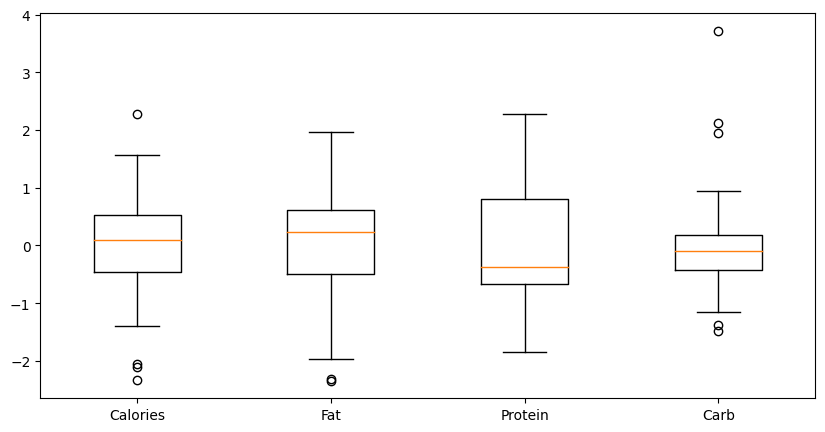

In [ ]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(x = [df_scale['Calories'], df_scale['Fat'], df_scale['Protein'], df_scale['Carb']],
           labels = df_scale.columns)
plt.show()

### 모델 적용

In [ ]:
# 모델
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters = 3, n_init = 'auto', random_state=42)
kmc.fit(X_scale)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [ ]:
kmc.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0], dtype=int32)

In [ ]:
np.unique(kmc.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 8, 15, 14]))

In [ ]:
kmc.cluster_centers_
# 각 클러스터 중심 평균 값
# 행이 군집, 열이 변수

array([[-0.827 , -1.5876, -1.1458,  1.0521],
       [-0.2576,  0.2796, -0.354 , -0.4606],
       [ 0.7486,  0.6076,  1.0341, -0.1077]])

In [ ]:
pd.DataFrame(kmc.cluster_centers_, columns = X.columns)

,Calories,Fat,Protein,Carb
0,-0.827049,-1.587644,-1.145805,1.052137
1,-0.257563,0.279648,-0.354044,-0.460603
2,0.748560,0.607603,1.034078,-0.107718


In [ ]:
print(kmc.transform(X_scale[:5]))
print(kmc.labels_[:5])

[[5.4246 3.4669 2.0549]
 [3.3027 2.0375 1.4196]
 [3.5397 2.1713 1.7794]
 [3.6353 2.498  1.2895]
 [3.8574 2.0928 0.6763]]
[2 2 2 2 2]


In [ ]:
kmc.n_iter_
# 알고리즘 반복 횟수

6

### 최적의 k 찾기

#### 엘보 방법

In [ ]:
# 최적의 k값
distortions = []
for k in range(1,11):
  kmc = KMeans(n_clusters = k, n_init = 'auto', random_state=42)
  kmc.fit(X_scale)
  distortions.append(kmc.inertia_)

In [ ]:
print(distortions)

[148.0, 89.57196734082763, 67.62722345316257, 49.40249913321466, 42.932095699513276, 34.43114263279401, 28.97876079661164, 24.459497436772267, 20.029182985046177, 18.071019632509312]


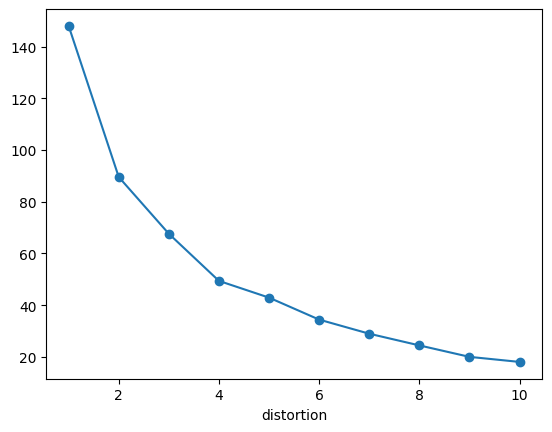

In [ ]:
plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('n of clusters')
plt.xlabel('distortion')
plt.show()

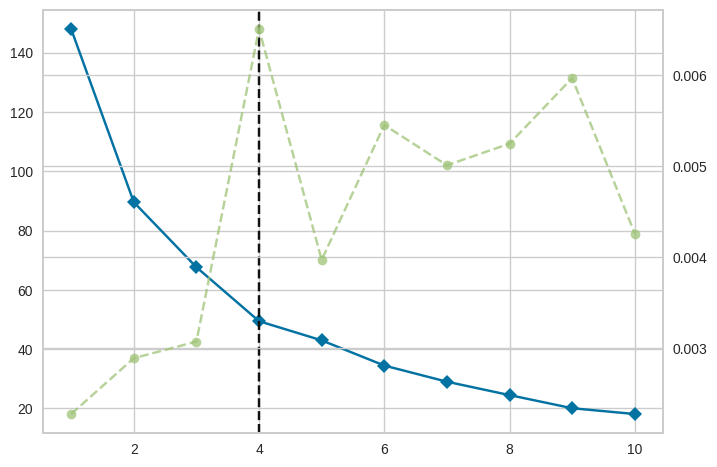

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
kmc = KMeans(n_init = 'auto', random_state=42)
vis = KElbowVisualizer(kmc, k = (1,11))
vis.fit(X_scale)
plt.show()

In [ ]:
# 실루엣 점수
from sklearn.metrics import silhouette_score
for k in range(2,5):
  kmc = KMeans(n_clusters = k, n_init = 'auto', random_state=42)
  kmc.fit(X_scale)
  y_pred = kmc.labels_
  print(k, ": ", silhouette_score(X_scale, y_pred, metric='euclidean'))

2 :  0.3842169400021826
3 :  0.2744674936295286
4 :  0.2964500024453468


### 최적 모델

In [ ]:
# 모델 k = 2
from sklearn.cluster import KMeans
kmc2 = KMeans(n_clusters = 2, n_init = 'auto', random_state=42)
kmc2.fit(X_scale)

KMeans(n_clusters=2, n_init='auto', random_state=42)

In [ ]:
kmc2.labels_

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int32)

In [ ]:
df_X = X
df_X['cluster'] = kmc2.labels_
df_X.head()

,Calories,Fat,Protein,Carb,cluster
0,311.0,18.5,5.3,31.4,1
1,275.0,13.0,3.2,39.0,1
2,284.5,14.0,2.5,37.5,1
3,279.5,12.5,4.5,41.0,1
4,273.0,14.0,4.5,34.0,1


In [ ]:
clusters = df_X.groupby('cluster')

In [ ]:
print(clusters.mean())
print(clusters.size())
# 군집1 낮은 칼로리, 지방, 단백질, 높은 탄수화물 10개의 초코바
# 군집2 높은 칼로리, 지방, 단백질, 낮은 탄수화물 27개의 초코바

          Calories        Fat   Protein       Carb
cluster                                           
0        198.85000   4.910000  1.400000  40.420000
1        235.87037  12.611111  3.777778  29.422222
cluster
0    10
1    27
dtype: int64


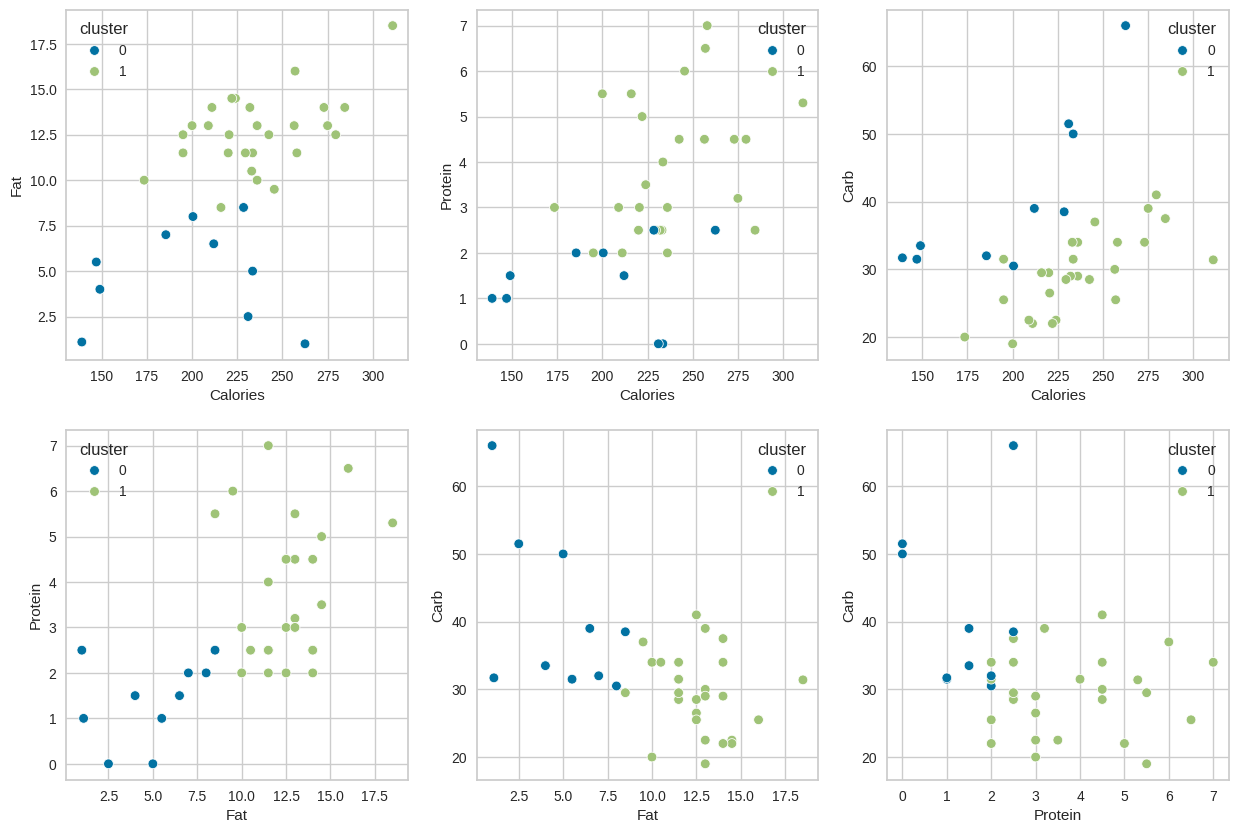

In [ ]:
# 산점도
fig = plt.figure(figsize = (15, 10))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)
# Calories        Fat   Protein       Carb
sns.scatterplot(data = df_X, x = 'Calories', y = 'Fat', hue = 'cluster', ax = ax1)
sns.scatterplot(data = df_X, x = 'Calories', y = 'Protein', hue = 'cluster', ax = ax2)
sns.scatterplot(data = df_X, x = 'Calories', y = 'Carb', hue = 'cluster', ax = ax3)
sns.scatterplot(data = df_X, x = 'Fat', y = 'Protein', hue = 'cluster', ax = ax4)
sns.scatterplot(data = df_X, x = 'Fat', y = 'Carb', hue = 'cluster', ax = ax5)
sns.scatterplot(data = df_X, x = 'Protein', y = 'Carb', hue = 'cluster', ax = ax6)
plt.show()

In [ ]:
# 모델 k = 3
from sklearn.cluster import KMeans
kmc3 = KMeans(n_clusters = 3, n_init = 'auto', random_state=42)
kmc3.fit(X_scale)
df_X = X
df_X['cluster'] = kmc3.labels_
clusters = df_X.groupby('cluster')
print(clusters.mean())
print(clusters.size())
# 군집1 비교적 낮은 칼로리, 지방, 단백질, 높은 탄수화물, 8개의 초코바
# 군집2 중간 정도 크기의 칼로리, 지방, 단백질, 낮은 탄수화물, 15개의 초코바
# 군집3 높은 칼로리, 지방, 단백질, 중간 정도 크기의 탄수화물 14개의 초코바

           Calories        Fat   Protein       Carb
cluster                                            
0        194.937500   4.075000  1.187500  41.900000
1        216.233333  11.666667  2.533333  28.233333
2        253.857143  13.000000  4.892857  31.421429
cluster
0     8
1    15
2    14
dtype: int64


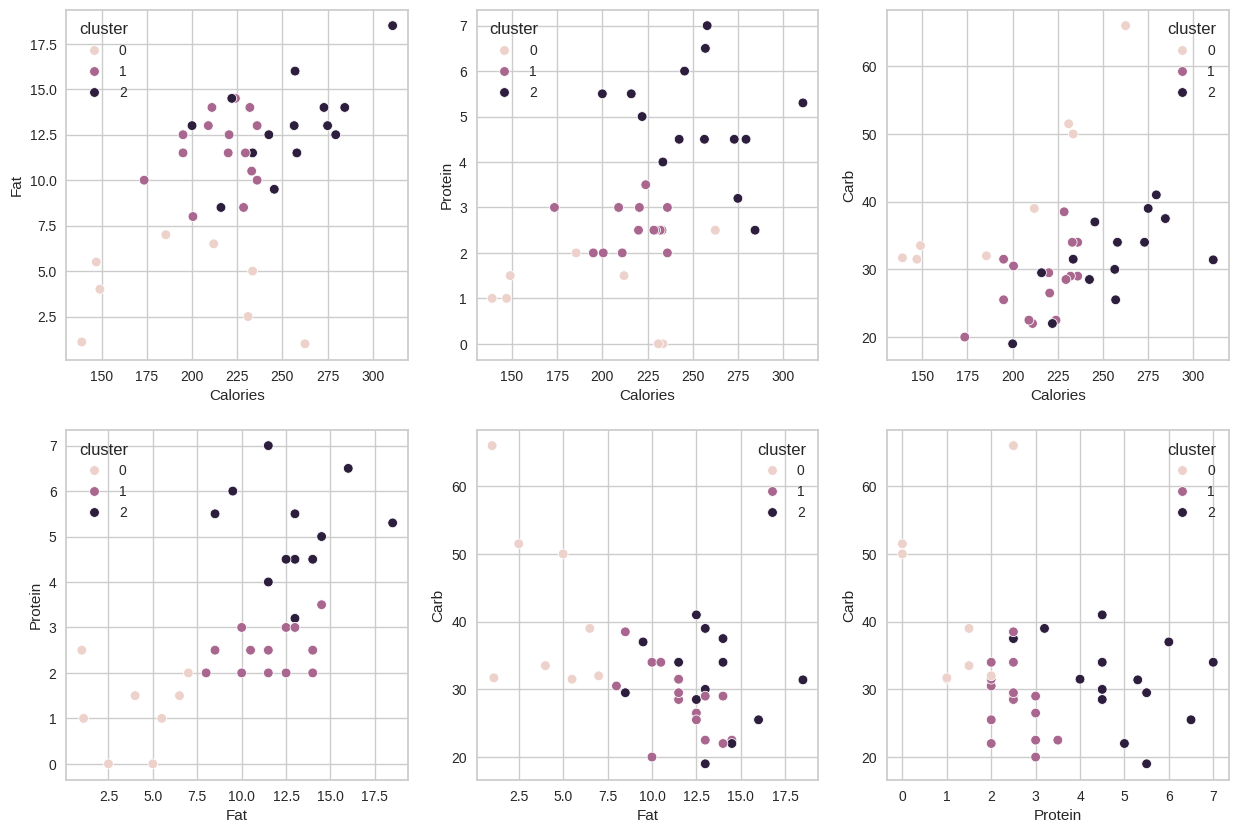

In [ ]:
# 산점도
fig = plt.figure(figsize = (15, 10))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)
# Calories        Fat   Protein       Carb
sns.scatterplot(data = df_X, x = 'Calories', y = 'Fat', hue = 'cluster', ax = ax1)
sns.scatterplot(data = df_X, x = 'Calories', y = 'Protein', hue = 'cluster', ax = ax2)
sns.scatterplot(data = df_X, x = 'Calories', y = 'Carb', hue = 'cluster', ax = ax3)
sns.scatterplot(data = df_X, x = 'Fat', y = 'Protein', hue = 'cluster', ax = ax4)
sns.scatterplot(data = df_X, x = 'Fat', y = 'Carb', hue = 'cluster', ax = ax5)
sns.scatterplot(data = df_X, x = 'Protein', y = 'Carb', hue = 'cluster', ax = ax6)
plt.show()

In [ ]:
# 모델 k = 4
from sklearn.cluster import KMeans
kmc4 = KMeans(n_clusters = 4, n_init = 'auto', random_state=42)
kmc4.fit(X_scale)
df_X = X
df_X['cluster'] = kmc4.labels_
clusters = df_X.groupby('cluster')
print(clusters.mean())
print(clusters.size())
# 군집1 비교적 낮은 칼로리, 지방, 단백질, 탄수화물 7개의 초코바
# 군집2 비교적 높은 칼로리, 지방, 낮은 단백질, 탄수화물 16개의 초코바
# 군집3 비교적 높은 칼로리, 지방, 단백질, 낮은 탄수화물 11개의 초코바
# 군집4 비교적 높은 칼로리, 탄수화물, 낮은 지방, 단백질 3개의 초코바

           Calories        Fat   Protein       Carb
cluster                                            
0        172.357143   6.014286  1.714286  31.171429
1        228.906250  12.218750  2.668750  30.062500
2        251.000000  13.045455  5.345455  30.172727
3        242.333333   2.833333  0.833333  55.833333
cluster
0     7
1    16
2    11
3     3
dtype: int64


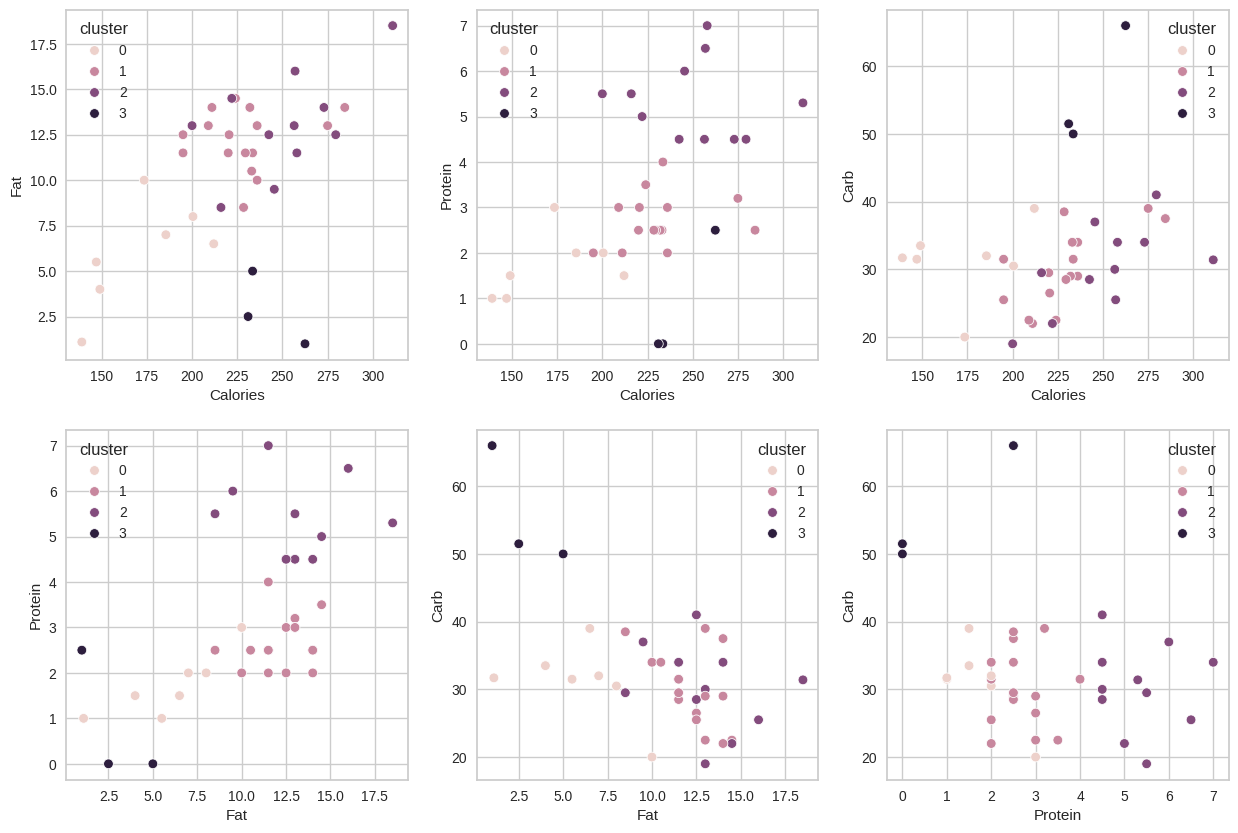

In [ ]:
# 산점도
fig = plt.figure(figsize = (15, 10))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)
# Calories        Fat   Protein       Carb
sns.scatterplot(data = df_X, x = 'Calories', y = 'Fat', hue = 'cluster', ax = ax1)
sns.scatterplot(data = df_X, x = 'Calories', y = 'Protein', hue = 'cluster', ax = ax2)
sns.scatterplot(data = df_X, x = 'Calories', y = 'Carb', hue = 'cluster', ax = ax3)
sns.scatterplot(data = df_X, x = 'Fat', y = 'Protein', hue = 'cluster', ax = ax4)
sns.scatterplot(data = df_X, x = 'Fat', y = 'Carb', hue = 'cluster', ax = ax5)
sns.scatterplot(data = df_X, x = 'Protein', y = 'Carb', hue = 'cluster', ax = ax6)
plt.show()

#### 실루엣도표

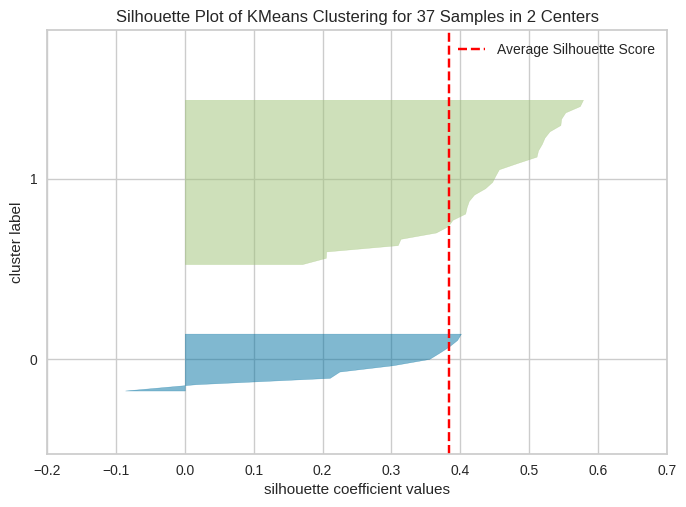

0.3842169400021826


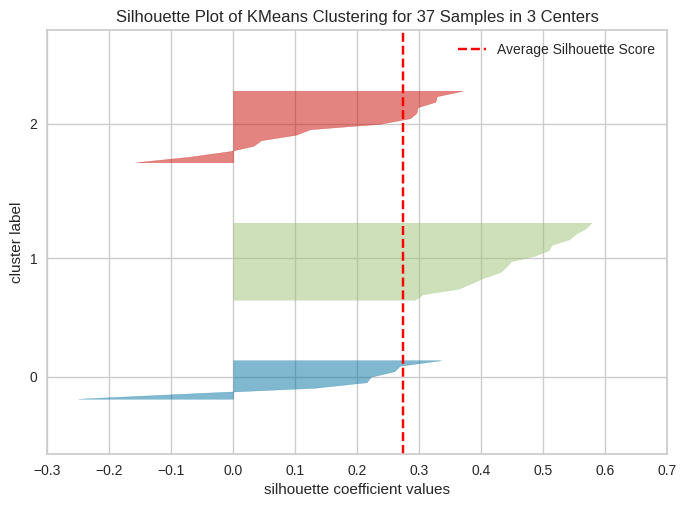

0.2744674936295286


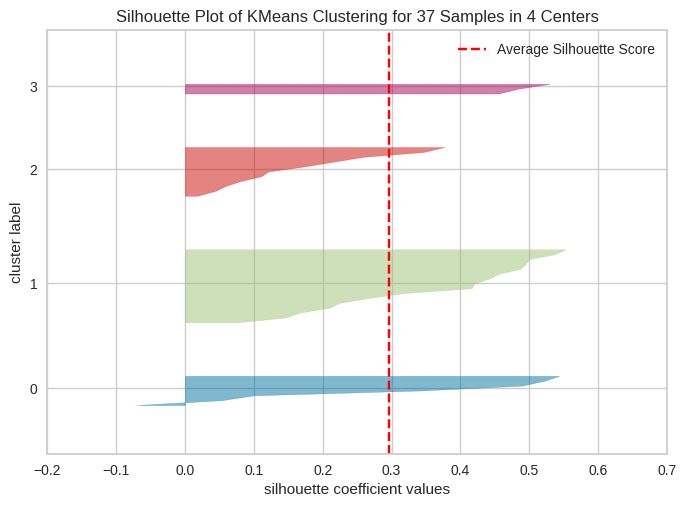

0.2964500024453468


In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
# K = 2
visualizer1 = SilhouetteVisualizer(kmc2, colors = 'yellowbrick')
visualizer1.fit(X_scale)
visualizer1.show()
print(visualizer1.silhouette_score_)
# # K = 3
visualizer2 = SilhouetteVisualizer(kmc3, colors = 'yellowbrick')
visualizer2.fit(X_scale)
visualizer2.show()
print(visualizer2.silhouette_score_)
# # K = 4
visualizer3 = SilhouetteVisualizer(kmc4, colors = 'yellowbrick')
visualizer3.fit(X_scale)
visualizer3.show()
print(visualizer3.silhouette_score_)
plt.show()

## PCA

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/Health.xlsx', engine = 'openpyxl')
df.head()

,Country Name,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate
0,Argentina,7.80,706.90,73.76,180.64,92.80,1.11,51.07,48.93,37057452,16458321,2.56,19.41
1,Austria,9.60,2415.78,78.13,126.29,63.09,0.24,51.47,48.53,8011566,3899156,1.36,9.80
2,Australia,6.70,1745.93,79.23,97.97,56.11,1.19,50.11,49.89,19153000,9603052,1.76,13.00
3,Brazil,5.99,262.76,70.02,247.53,125.46,1.45,50.58,49.42,175287587,79593872,2.30,20.20
4,Cambodia,9.43,17.63,58.35,292.21,226.73,2.24,51.40,48.60,12152354,5579215,3.81,28.06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       38 non-null     object 
 1   Death Rate         38 non-null     float64
 2   Health Expend      38 non-null     float64
 3   Life Exp           38 non-null     float64
 4   Male Mortality     38 non-null     float64
 5   Female Mortality   38 non-null     float64
 6   Population Growth  38 non-null     float64
 7   Female Pop         38 non-null     float64
 8   Male Pop           38 non-null     float64
 9   Total Pop          38 non-null     int64  
 10  Labor Force        38 non-null     int64  
 11  Fertility Rate     38 non-null     float64
 12  Birth Rate         38 non-null     float64
dtypes: float64(10), int64(2), object(1)
memory usage: 4.0+ KB


In [ ]:
df.drop('Country Name', axis = 1).describe()

,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,3.800000e+01,3.800000e+01,38.000000,38.000000
mean,8.481842,1231.432368,72.562632,177.039474,112.393947,1.070000,50.311053,49.688947,1.045051e+08,4.963038e+07,2.395263,18.100526
std,2.660258,1266.610599,8.277978,94.000405,87.394331,1.194417,1.683078,1.683078,2.590919e+08,1.329950e+08,1.335806,9.391222
min,2.530000,5.370000,50.000000,87.190000,47.580000,-2.850000,41.560000,48.140000,4.363000e+05,1.887430e+05,1.260000,9.300000
25%,6.527500,161.195000,70.630000,107.057500,61.747500,0.410000,50.117500,48.870000,7.391079e+06,3.923451e+06,1.510000,11.125000
50%,8.695000,684.350000,76.075000,143.820000,71.955000,1.110000,50.565000,49.435000,3.391358e+07,1.601940e+07,1.870000,13.865000
75%,10.100000,2181.890000,78.085000,201.982500,114.107500,1.512500,51.130000,49.882500,6.265822e+07,2.861630e+07,2.802500,23.782500
max,15.960000,4788.310000,81.080000,493.450000,374.820000,4.680000,51.860000,58.440000,1.262645e+09,7.348526e+08,6.750000,45.960000


### 상관행렬

In [ ]:
cor_mat = df.drop('Country Name', axis = 1).corr()

In [ ]:
cor_mat = round(cor_mat, 2);cor_mat

,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate
Death Rate,1.00,0.11,-0.45,0.46,0.52,-0.22,0.44,-0.44,-0.10,-0.11,0.40,0.27
Health Expend,0.11,1.00,0.63,-0.56,-0.51,-0.32,0.26,-0.26,-0.18,-0.15,-0.50,-0.60
Life Exp,-0.45,0.63,1.00,-0.92,-0.96,-0.51,0.16,-0.16,-0.15,-0.10,-0.90,-0.91
Male Mortality,0.46,-0.56,-0.92,1.00,0.95,0.36,0.04,-0.04,0.03,-0.01,0.74,0.77
Female Mortality,0.52,-0.51,-0.96,0.95,1.00,0.48,-0.07,0.07,0.08,0.04,0.85,0.85
Population Growth,-0.22,-0.32,-0.51,0.36,0.48,1.00,-0.67,0.67,0.05,0.02,0.65,0.70
Female Pop,0.44,0.26,0.16,0.04,-0.07,-0.67,1.00,-1.00,-0.25,-0.23,-0.24,-0.30
Male Pop,-0.44,-0.26,-0.16,-0.04,0.07,0.67,-1.00,1.00,0.25,0.23,0.24,0.30
Total Pop,-0.10,-0.18,-0.15,0.03,0.08,0.05,-0.25,0.25,1.00,0.98,0.01,0.06
Labor Force,-0.11,-0.15,-0.10,-0.01,0.04,0.02,-0.23,0.23,0.98,1.00,-0.04,0.01


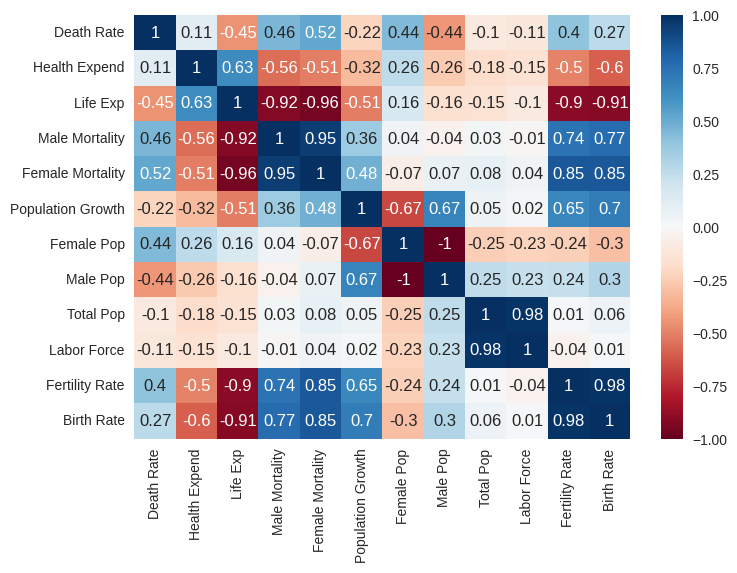

In [ ]:
sns.heatmap(cor_mat,
            cmap = 'RdBu',
            annot=True)
plt.show()

In [ ]:
df.columns

Index(['Country Name', 'Death Rate', 'Health Expend', 'Life Exp',
       'Male Mortality', 'Female Mortality', 'Population Growth', 'Female Pop',
       'Male Pop', 'Total Pop', 'Labor Force', 'Fertility Rate', 'Birth Rate'],
      dtype='object')

In [ ]:
# 데이터 분할
# 전체 데이터
X = df.drop('Country Name', axis = 1)

print("X 데이터: ", X.shape)

X 데이터:  (38, 12)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X)
X_scale = standard.transform(X)

### 주성분 분석

In [ ]:
# 주성분 분석
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scale)

PCA()

In [ ]:
pca.components_.shape
# 주성분 개수, 원본 데이터의 특성 개수

(12, 12)

### 설명된 분산

In [ ]:
# 설명된 분산
print(pca.explained_variance_)
print(np.sqrt(pca.explained_variance_))
print(pca.explained_variance_ratio_)

[5.7455 3.0435 1.8886 0.827  0.3987 0.2733 0.0862 0.0214 0.0207 0.0159
 0.0035 0.    ]
[2.397  1.7446 1.3743 0.9094 0.6315 0.5227 0.2936 0.1463 0.1439 0.126
 0.0596 0.    ]
[0.4662 0.247  0.1532 0.0671 0.0324 0.0222 0.007  0.0017 0.0017 0.0013
 0.0003 0.    ]


In [ ]:
exp_var = [round(x,5) for x in pca.explained_variance_]
print(exp_var)
exp_std = [round(x,5) for x in np.sqrt(pca.explained_variance_)]
print(exp_std)
prop_var = [round(x,5) for x in pca.explained_variance_ratio_]
print(prop_var)

[5.74546, 3.04353, 1.88858, 0.82701, 0.39873, 0.27326, 0.08622, 0.0214, 0.0207, 0.01588, 0.00355, 0.0]
[2.39697, 1.74457, 1.37426, 0.9094, 0.63145, 0.52274, 0.29362, 0.14629, 0.14388, 0.12602, 0.05956, 0.0]
[0.46619, 0.24695, 0.15324, 0.0671, 0.03235, 0.02217, 0.007, 0.00174, 0.00168, 0.00129, 0.00029, 0.0]


In [ ]:
pca_summary = pd.DataFrame({'var': exp_var,
                            'std': exp_std,
                            'prop_var': prop_var})
pca_summary

,var,std,prop_var
0,5.74546,2.39697,0.46619
1,3.04353,1.74457,0.24695
2,1.88858,1.37426,0.15324
3,0.82701,0.90940,0.06710
4,0.39873,0.63145,0.03235
5,0.27326,0.52274,0.02217
6,0.08622,0.29362,0.00700
7,0.02140,0.14629,0.00174
8,0.02070,0.14388,0.00168
9,0.01588,0.12602,0.00129


In [ ]:
# 누적합
pca_summary['cum_var'] = pca_summary['prop_var'].cumsum()

In [ ]:
pca_summary.T

,0,1,2,3,4,5,6,7,8,9,10,11
var,5.74546,3.04353,1.88858,0.82701,0.39873,0.27326,0.08622,0.02140,0.02070,0.01588,0.00355,0.0
std,2.39697,1.74457,1.37426,0.90940,0.63145,0.52274,0.29362,0.14629,0.14388,0.12602,0.05956,0.0
prop_var,0.46619,0.24695,0.15324,0.06710,0.03235,0.02217,0.00700,0.00174,0.00168,0.00129,0.00029,0.0
cum_var,0.46619,0.71314,0.86638,0.93348,0.96583,0.98800,0.99500,0.99674,0.99842,0.99971,1.00000,1.0


### 주성분 개수 찾는 다른 방법

In [ ]:
print(pca_summary['var'])
print(pca_summary[pca_summary['var'] > 1])
# 주성분 3개
print(pca_summary[pca_summary['var'] > 0.7])
# 주성분 4개

0     5.74546
1     3.04353
2     1.88858
3     0.82701
4     0.39873
5     0.27326
6     0.08622
7     0.02140
8     0.02070
9     0.01588
10    0.00355
11    0.00000
Name: var, dtype: float64
       var      std  prop_var  cum_var
0  5.74546  2.39697   0.46619  0.46619
1  3.04353  1.74457   0.24695  0.71314
2  1.88858  1.37426   0.15324  0.86638
       var      std  prop_var  cum_var
0  5.74546  2.39697   0.46619  0.46619
1  3.04353  1.74457   0.24695  0.71314
2  1.88858  1.37426   0.15324  0.86638
3  0.82701  0.90940   0.06710  0.93348


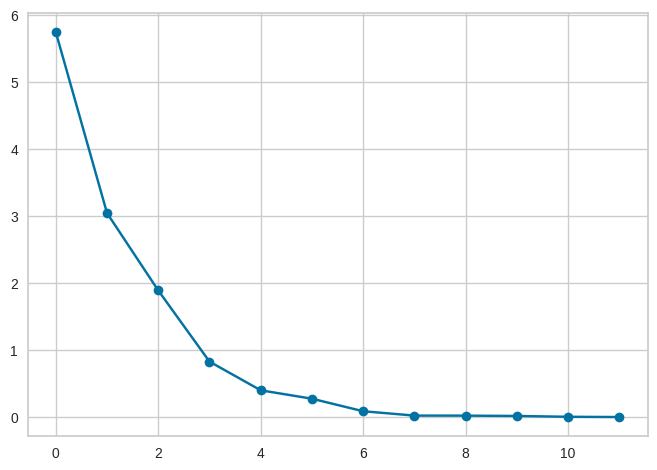

In [ ]:
# 스크리 플랏: 분산 (개별 고유값) 시각화
plt.plot(pca_summary['var'], marker = 'o')
plt.show()
# 기울기가 완만해지는 지점 = 3 ~ 4개

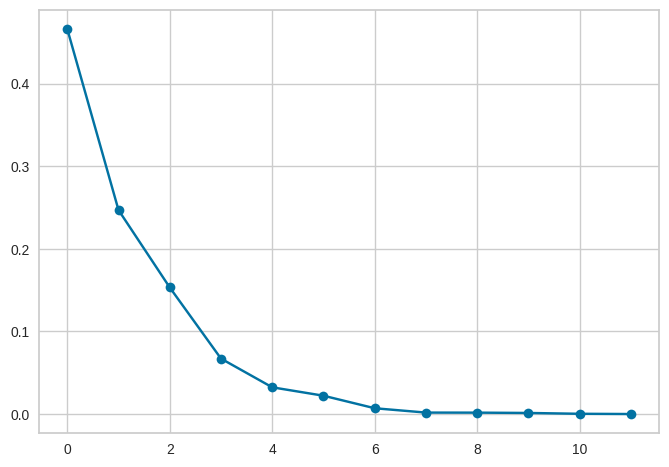

In [ ]:
# 스크리 플랏: 분산 비율 시각화
plt.plot(pca_summary['prop_var'], marker = 'o')
plt.show()
# 기울기가 완만해지는 지점 = 3 ~ 4개

### 회전 속성(가중치)

In [ ]:
# 회전 속성(가중치)
pca.components_

array([[ 0.1261, -0.278 , -0.4081,  0.3627,  0.3903,  0.2902, -0.1479,
         0.1479,  0.0662,  0.0454,  0.3952,  0.4071],
       [-0.425 , -0.0809,  0.109 , -0.2127, -0.1698,  0.27  , -0.4962,
         0.4962,  0.2787,  0.2795, -0.0723, -0.0213],
       [ 0.1651, -0.0621, -0.0832,  0.0759,  0.0691, -0.2739,  0.185 ,
        -0.185 ,  0.6283,  0.6332, -0.0833, -0.0731],
       [ 0.504 ,  0.7674,  0.0264, -0.1389,  0.0671,  0.1903, -0.1714,
         0.1714,  0.0839,  0.0786,  0.1546,  0.0211],
       [ 0.4884, -0.3007, -0.0709,  0.0364,  0.0013, -0.5254, -0.3892,
         0.3892, -0.1013, -0.1119, -0.1302, -0.2144],
       [-0.2085,  0.2687, -0.0633,  0.5937,  0.3786,  0.0955, -0.0787,
         0.0787, -0.0281, -0.0297, -0.4884, -0.3505],
       [-0.4398,  0.3812, -0.0775,  0.1681, -0.0193, -0.6529, -0.0966,
         0.0966,  0.035 , -0.064 ,  0.2738,  0.3186],
       [ 0.0909,  0.0276, -0.2171,  0.2554, -0.5217,  0.1162,  0.0112,
        -0.0112,  0.5484, -0.5321, -0.0895,  0.0279],


In [ ]:
pca_rotation = pd.DataFrame(pca.components_.T, index = X.columns)
pca_rotation

,0,1,2,3,4,5,6,7,8,9,10,11
Death Rate,0.126145,-0.424983,0.165146,0.503973,0.488364,-0.208530,-0.439808,0.090886,-0.122432,-0.099042,0.117218,-7.803392e-17
Health Expend,-0.278031,-0.080890,-0.062106,0.767432,-0.300726,0.268738,0.381190,0.027615,0.113210,-0.037186,0.020546,-9.348373e-17
Life Exp,-0.408138,0.108992,-0.083168,0.026393,-0.070852,-0.063321,-0.077499,-0.217095,-0.866220,0.031854,0.020328,-7.129325e-17
Male Mortality,0.362694,-0.212669,0.075944,-0.138910,0.036447,0.593650,0.168148,0.255436,-0.353982,-0.465020,-0.096666,-1.643205e-16
Female Mortality,0.390288,-0.169845,0.069085,0.067137,0.001345,0.378620,-0.019350,-0.521694,-0.081871,0.621795,0.017939,8.753843e-17
Population Growth,0.290205,0.269997,-0.273859,0.190298,-0.525391,0.095473,-0.652853,0.116203,-0.008817,-0.078857,-0.022449,1.076963e-16
Female Pop,-0.147900,-0.496239,0.185012,-0.171418,-0.389214,-0.078719,-0.096557,0.011189,0.027940,0.014412,-0.011713,7.071068e-01
Male Pop,0.147900,0.496239,-0.185012,0.171418,0.389214,0.078719,0.096557,-0.011189,-0.027940,-0.014412,0.011713,7.071068e-01
Total Pop,0.066235,0.278698,0.628251,0.083946,-0.101260,-0.028055,0.034968,0.548382,-0.170282,0.413413,-0.057456,1.270372e-16
Labor Force,0.045362,0.279519,0.633222,0.078590,-0.111893,-0.029667,-0.063967,-0.532139,0.090049,-0.450248,0.034185,-2.342951e-16


In [ ]:
# 주성분 3개
round(pca_rotation, 5).iloc[:, 0:3]
# PC1: 남성 사망률, 여성사망률, 출산율, 출생률 관련 특성
# PC2: 여성인구, 사망률 관련 특성
# PC3: 총인구, 노동인구 관련 특성

,0,1,2
Death Rate,0.12614,-0.42498,0.16515
Health Expend,-0.27803,-0.08089,-0.06211
Life Exp,-0.40814,0.10899,-0.08317
Male Mortality,0.36269,-0.21267,0.07594
Female Mortality,0.39029,-0.16985,0.06908
Population Growth,0.29020,0.27000,-0.27386
Female Pop,-0.14790,-0.49624,0.18501
Male Pop,0.14790,0.49624,-0.18501
Total Pop,0.06623,0.27870,0.62825
Labor Force,0.04536,0.27952,0.63322


In [ ]:
# 주성분 4개
round(pca_rotation, 5).iloc[:, 0:4]
# PC1: 남성 사망률, 여성사망률, 출산율, 출생률 관련 특성
# PC2: 여성인구, 사망률 관련 특성
# PC3: 총인구, 노동인구 관련 특성
# PC4: 인구증가률, 남성인구 관련 특성

,0,1,2,3
Death Rate,0.12614,-0.42498,0.16515,0.50397
Health Expend,-0.27803,-0.08089,-0.06211,0.76743
Life Exp,-0.40814,0.10899,-0.08317,0.02639
Male Mortality,0.36269,-0.21267,0.07594,-0.13891
Female Mortality,0.39029,-0.16985,0.06908,0.06714
Population Growth,0.29020,0.27000,-0.27386,0.19030
Female Pop,-0.14790,-0.49624,0.18501,-0.17142
Male Pop,0.14790,0.49624,-0.18501,0.17142
Total Pop,0.06623,0.27870,0.62825,0.08395
Labor Force,0.04536,0.27952,0.63322,0.07859


### 주성분 분포 시각화

In [ ]:
# 바이플랏
def biplot(score,coeff,pcx,pcy,labels = None):
  pca1 = pcx-1
  pca2 = pcy-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n = score.shape[1]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())
  plt.scatter(xs*scalex,ys*scaley)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2], color = 'r', alpha = 0.3)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color = 'r', ha = 'center', va = 'center')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color = 'r', ha = 'center', va = 'center')
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcx))
  plt.ylabel("PC{}".format(pcy))
  plt.grid()

In [ ]:
# 주성분 점수
scores = pca.transform(X_scale)

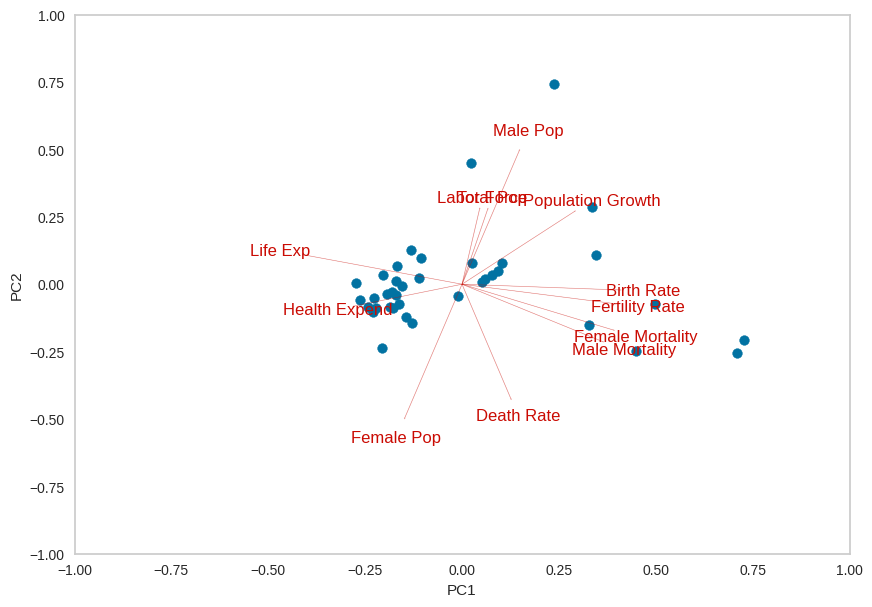

In [ ]:
# 주성분 분포 시각화: 모여있는 변수들이 주성분
plt.figure(figsize=(10,7))
biplot(scores, pca.components_.T, 1, 2, labels = X.columns)
plt.show()
# PC1: 남성 사망률, 여성사망률, 출산율, 출생률 관련 특성
# PC2: 여성인구, 사망률 관련 특성
# PC3: 총인구, 노동인구 관련 특성
# PC4: 인구증가률, 남성인구 관련 특성

#### 주성분 점수

In [ ]:
pca_scores = pd.DataFrame(scores)

In [ ]:
# 주성분 3개
pca_scores3 = pca_scores.iloc[:,0:3]
pca_scores3.columns = ['PC1', 'PC2', 'PC3']
pca_scores3.head()

,PC1,PC2,PC3
0,-0.097854,-0.409961,-0.228518
1,-2.036138,-0.979362,-0.002034
2,-1.482262,0.652202,-0.710550
3,0.695572,0.312542,0.265037
4,2.910229,-1.431576,-0.186157


In [ ]:
new_data3 = pd.concat([df['Country Name'], pca_scores3], axis = 1)
new_data3.head()

,Country Name,PC1,PC2,PC3
0,Argentina,-0.097854,-0.409961,-0.228518
1,Austria,-2.036138,-0.979362,-0.002034
2,Australia,-1.482262,0.652202,-0.710550
3,Brazil,0.695572,0.312542,0.265037
4,Cambodia,2.910229,-1.431576,-0.186157


In [ ]:
# 주성분 4개
pca_scores4 = pca_scores.iloc[:,0:4]
pca_scores4.columns = ['PC1', 'PC2', 'PC3', 'PC4']
pca_scores4.head()

,PC1,PC2,PC3,PC4
0,-0.097854,-0.409961,-0.228518,-0.639682
1,-2.036138,-0.979362,-0.002034,0.424862
2,-1.482262,0.652202,-0.710550,-0.007272
3,0.695572,0.312542,0.265037,-1.136187
4,2.910229,-1.431576,-0.186157,-0.596646


In [ ]:
new_data4 = pd.concat([df['Country Name'], pca_scores4], axis = 1)
new_data4.head()

,Country Name,PC1,PC2,PC3,PC4
0,Argentina,-0.097854,-0.409961,-0.228518,-0.639682
1,Austria,-2.036138,-0.979362,-0.002034,0.424862
2,Australia,-1.482262,0.652202,-0.710550,-0.007272
3,Brazil,0.695572,0.312542,0.265037,-1.136187
4,Cambodia,2.910229,-1.431576,-0.186157,-0.596646


## 주성분 데이터를 이용하여 다른 모델 적용

### KMC - 원데이터

In [ ]:
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters = 3, n_init = 'auto', random_state=42)
kmc.fit(X_scale)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [ ]:
np.unique(kmc.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([12, 21,  5]))

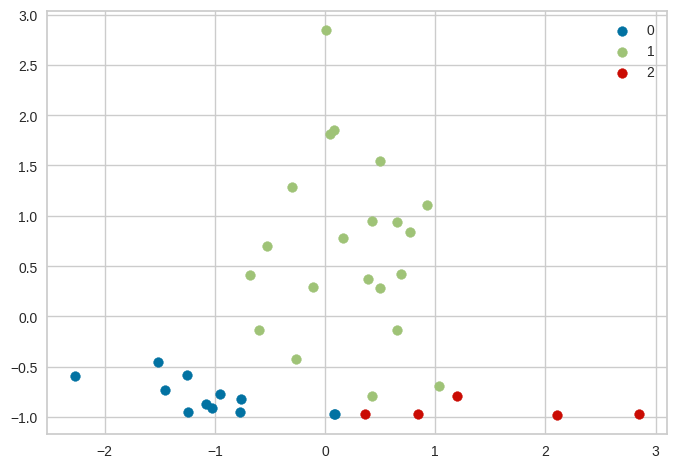

In [ ]:
for label in range(0,3):
  data = X_scale[kmc.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['0','1','2'])
plt.show()

In [ ]:
kmc_label = kmc.labels_
X_scale_new = pd.DataFrame(X_scale)

In [ ]:
X_scale_new['cluster'] = kmc_label
X_scale_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,cluster
0,-0.259747,-0.419682,0.146587,0.038817,-0.227211,0.033939,0.456981,-0.456981,-0.263818,-0.252771,0.124979,0.141308,1
1,0.425961,0.947604,0.681580,-0.547133,-0.571728,-0.704228,0.697831,-0.697831,-0.377429,-0.348472,-0.785414,-0.895724,1
2,-0.678792,0.411653,0.816246,-0.852452,-0.652668,0.101816,-0.121059,0.121059,-0.333850,-0.305009,-0.481949,-0.550407,1
3,-0.949266,-0.775041,-0.311279,0.759962,0.151514,0.322417,0.161940,-0.161940,0.276862,0.228322,-0.072272,0.226558,0
4,0.361200,-0.971171,-1.739968,1.241660,1.325839,0.992706,0.655683,-0.655683,-0.361233,-0.335670,1.073305,1.074744,2


### KMC - 주성분데이터

In [ ]:
# 데이터 분할
# 전체 데이터
X = new_data3.drop('Country Name', axis = 1)

print("X 데이터: ", X.shape)

X 데이터:  (38, 3)


In [ ]:
# 주성분 데이터로 KMC
# 모델
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters = 3, n_init = 'auto', random_state=42)
kmc.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [ ]:
np.unique(kmc.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([10, 23,  5]))

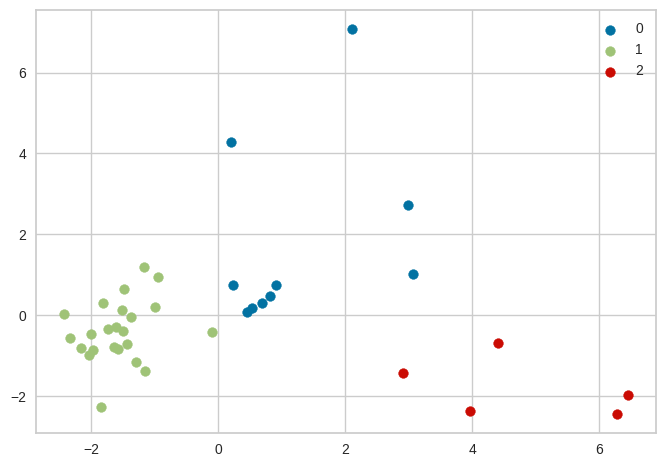

In [ ]:
for label in range(0,3):
  data = X[kmc.labels_ == label]
  plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.legend(['0','1','2'])
plt.show()

In [ ]:
kmc_label = kmc.labels_

In [ ]:
X['cluster'] = kmc_label
X.head()

,PC1,PC2,PC3,cluster
0,-0.097854,-0.409961,-0.228518,1
1,-2.036138,-0.979362,-0.002034,1
2,-1.482262,0.652202,-0.710550,1
3,0.695572,0.312542,0.265037,0
4,2.910229,-1.431576,-0.186157,2


### 로지스틱 회귀 - 원데이터

In [ ]:
# 로지스틱 회귀분석
X_logit = X_scale_new.drop('cluster', axis = 1)
y = X_scale_new['cluster']

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_validate
score = cross_validate(lr, X_logit, y)
print(np.mean(score['test_score']))
print(np.mean(score['fit_time']))

1.0
0.06485710144042969


### 로지스틱 회귀 - 주성분데이터

In [ ]:
# 로지스틱 회귀분석
X_pca = X.drop('cluster', axis = 1)
y = X['cluster']

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_validate
score = cross_validate(lr, X_pca, y)
print(np.mean(score['test_score']))
print(np.mean(score['fit_time']))

1.0
0.01256699562072754
